Housing Price Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
trainset=pd.read_csv('train.csv')

In [3]:
trainset.shape

(1460, 81)

In [4]:
trainset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Dropping MSSubClass, Id, Street, MoSold, MiscFeature, GarageCars columns

In [5]:
trainset.drop(['Id','MSSubClass','Street','MoSold','MiscFeature','GarageCars'], axis = 1,inplace=True)

In [6]:
trainset.shape  #81-6

(1460, 75)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda236c1e10>,
      dtype=object)

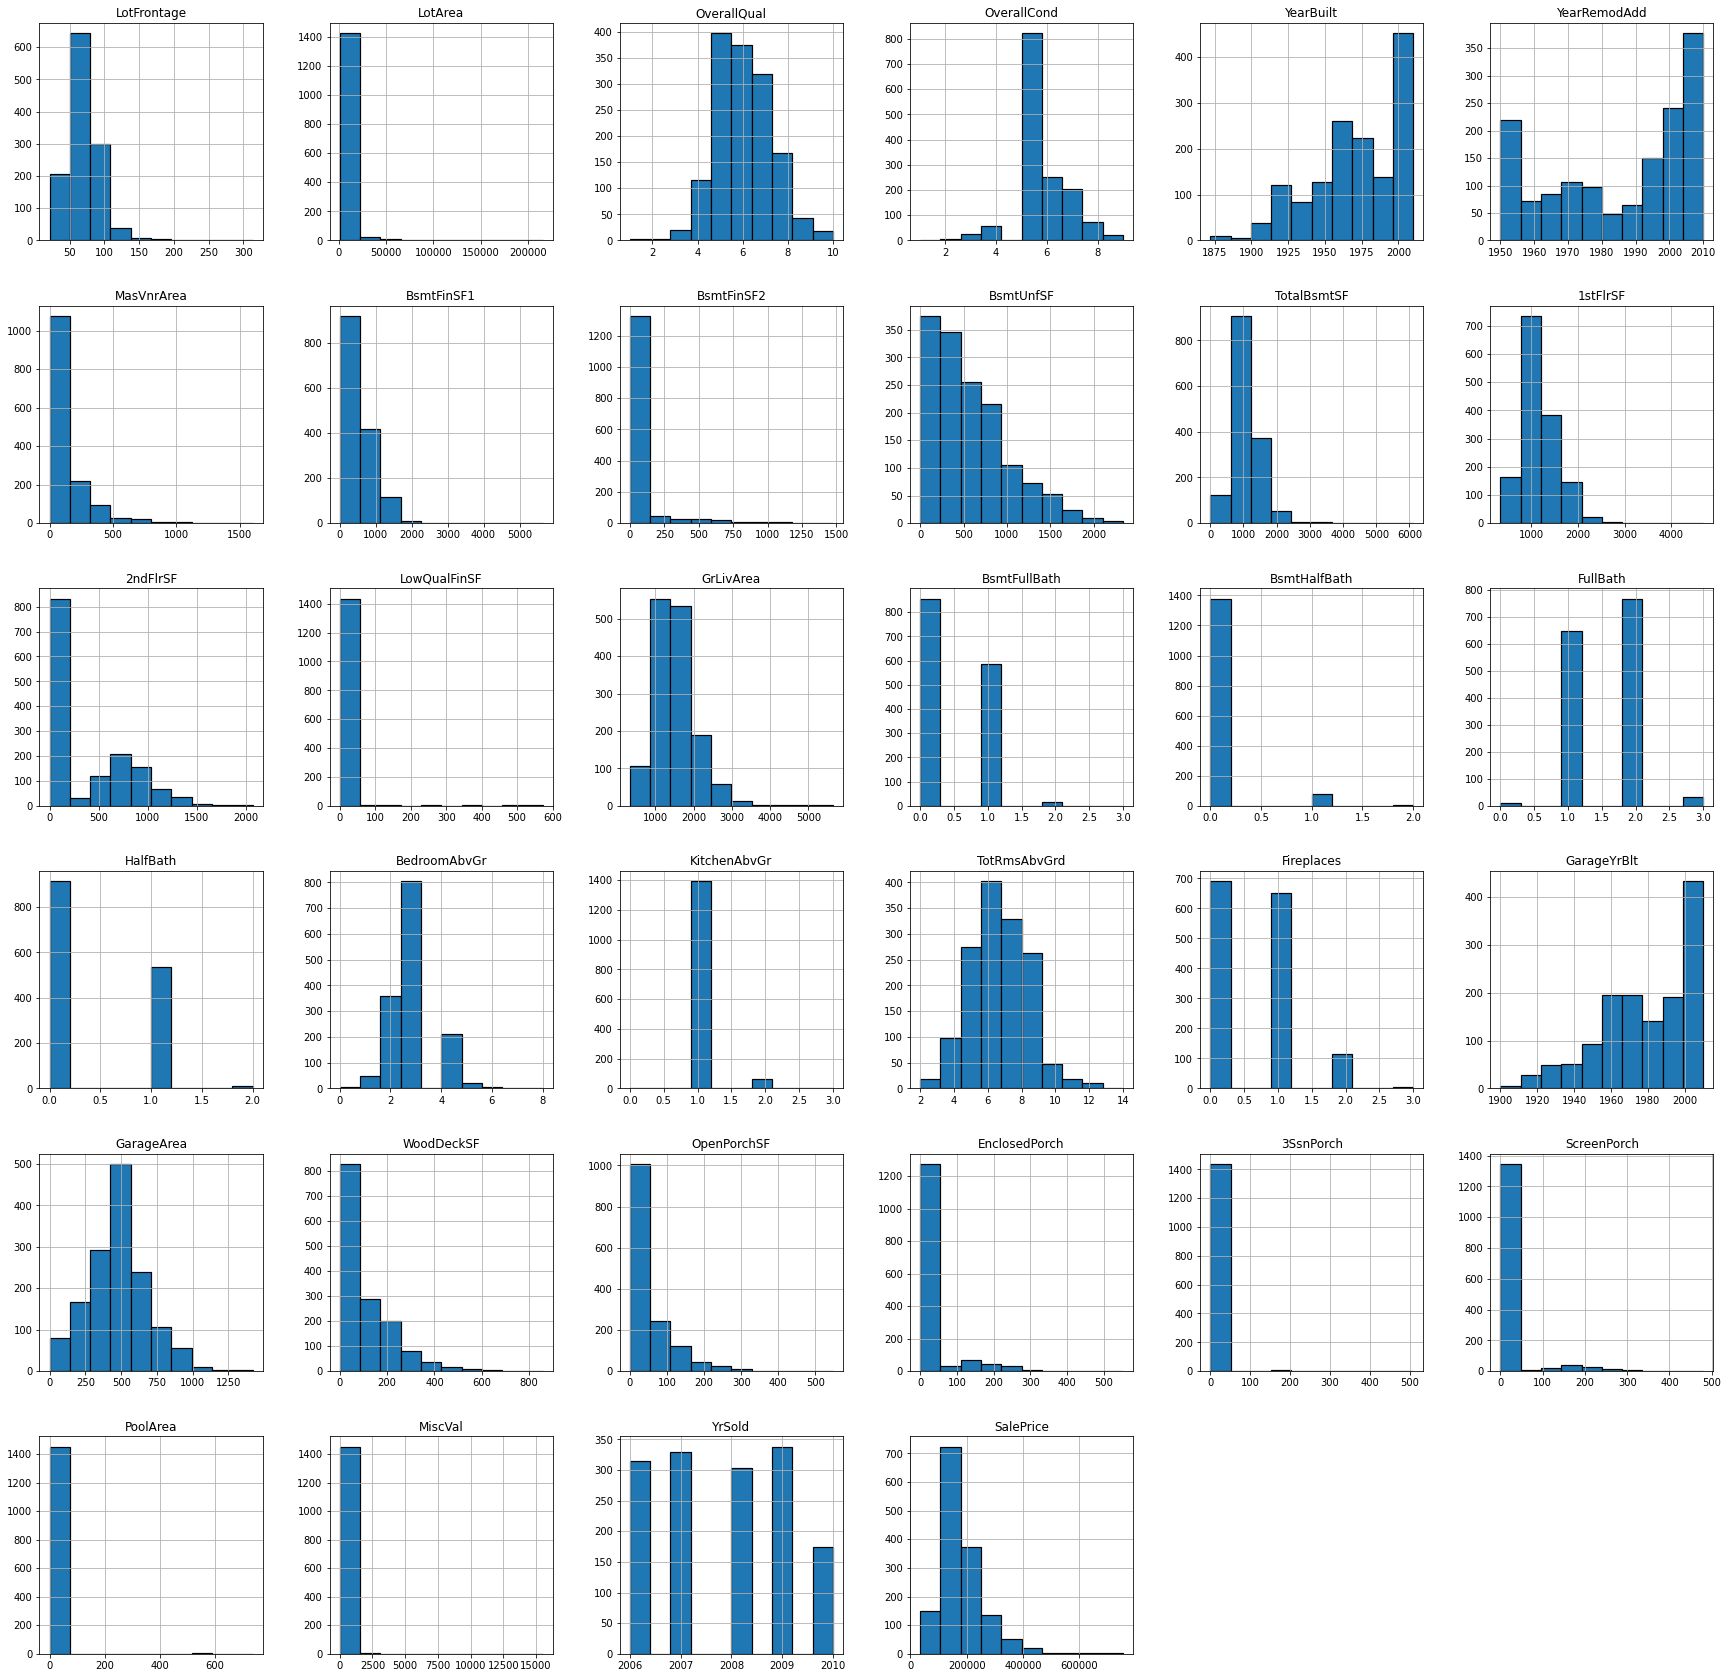

In [7]:
trainset.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30))

In [8]:
#plt.figure(figsize=(30, 30))
#sns.pairplot(trainset, height=3, diag_kind="hist")


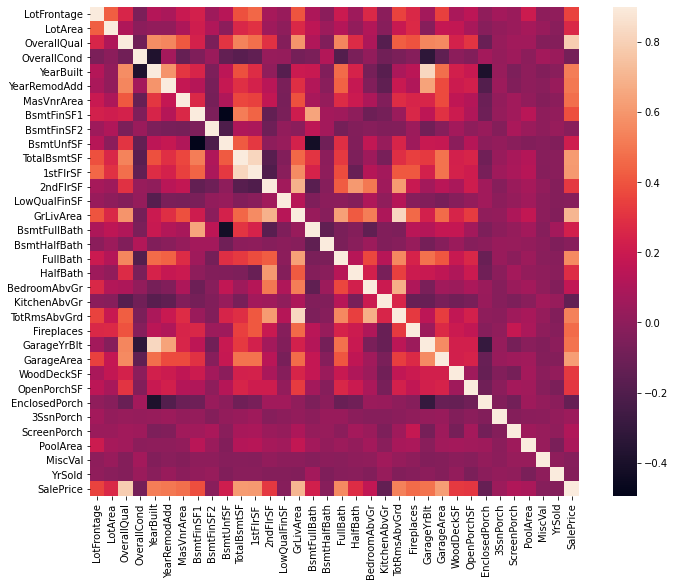

In [9]:
corrmat = trainset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

Checking for null values

In [10]:
trainset.isnull().sum()

MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
LotShape            0
                 ... 
MiscVal             0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 75, dtype: int64

Replacing all the 'NA' values in Alley column with 'None'

In [11]:
trainset["Alley"].fillna("None", inplace = True) 

In [12]:
trainset.isnull().sum()

MSZoning           0
LotFrontage      259
LotArea            0
Alley              0
LotShape           0
                ... 
MiscVal            0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [13]:
trainset.head(5)

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,0,2008,WD,Normal,208500
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,0,2007,WD,Normal,181500
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,0,2008,WD,Normal,223500
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,0,2006,WD,Abnorml,140000
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,0,2008,WD,Normal,250000


Replacing empty values in LotFrontage column by mean of all the other values in the column

In [14]:
trainset['LotFrontage']=trainset['LotFrontage'].replace(np.NaN,trainset['LotFrontage'].mean())

In [15]:
trainset.isnull().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Alley            0
LotShape         0
                ..
MiscVal          0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [16]:
trainset.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,0,2008,WD,Normal,208500
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,0,2007,WD,Normal,181500
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,0,2008,WD,Normal,223500
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,0,2006,WD,Abnorml,140000
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,0,2008,WD,Normal,250000


Replacing all the 'NA' values in Fence column with 'None'



In [17]:
trainset["Fence"].fillna("None", inplace = True)

Replacing empty values in SaleType and MSZoning column with the mode of the other values in the column

In [18]:
trainset['SaleType'] = trainset['SaleType'].fillna(trainset['SaleType'].mode()[0])

trainset['MSZoning'] = trainset['MSZoning'].fillna(trainset['MSZoning'].mode()[0])


Adding a current_year column

In [19]:
trainset['current_year']=2021

Adding a years_since_built column

In [20]:
trainset['years_since_built']=trainset['current_year']-trainset['YearBuilt']

In [21]:
trainset.shape

(1460, 77)

In [22]:
trainset.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,current_year,years_since_built
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,None,0,2008,WD,Normal,208500,2021,18
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,None,0,2007,WD,Normal,181500,2021,45
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,None,0,2008,WD,Normal,223500,2021,20
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,None,0,2006,WD,Abnorml,140000,2021,106
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,None,0,2008,WD,Normal,250000,2021,21


In [23]:
trainset.drop(['YearBuilt'],axis=1,inplace=True)

In [24]:
trainset.shape

(1460, 76)

Adding a years_since_remodeled column

In [25]:
trainset['years_since_remodeled']=trainset['current_year']-trainset['YearRemodAdd']

trainset.drop(['YearRemodAdd'],axis=1,inplace=True)


In [26]:
trainset.shape

(1460, 76)

Adding a years_since_sold column

In [27]:
trainset['years_since_sold']=trainset['current_year']-trainset['YrSold']


trainset.drop(['YrSold'],axis=1,inplace=True)


trainset.shape

(1460, 76)

After studying the dataset, it is seen that in most cases GarageYrBlt=YearBuilt, so we drop GarageYrBlt

In [28]:
trainset.drop(['GarageYrBlt'], axis = 1,inplace=True)

trainset.shape

(1460, 75)

Removing current_year column

In [29]:
trainset.drop(['current_year'], axis = 1,inplace=True)
trainset.shape

(1460, 74)

After studying the dataset it is observed that TotalBsmtSF=BsmtFinSF1+BsmtFinSF2+BsmtUnfSf, so we add a new column BsmtFin=BsmtFinSF1+BsmtFinSF2

In [30]:
trainset['BsmtFin']=trainset['BsmtFinSF1']+trainset['BsmtFinSF2']

trainset.shape

(1460, 75)

In [31]:
#Dropping BsmtFinSF1 and BsmtFinSF2
trainset.drop(['BsmtFinSF1','BsmtFinSF2'], axis = 1,inplace=True)

trainset.shape

(1460, 73)

In [32]:
trainset.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,None,0,WD,Normal,181500,45,45,14,978
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,None,0,WD,Normal,250000,21,21,13,655


Since we have totalBsmtSF and BsmtFin, we can drop BsmtUnfSF

In [33]:
trainset.drop(['BsmtUnfSF'], axis = 1,inplace=True)

In [34]:
trainset.shape

(1460, 72)

In [35]:
trainset.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,None,0,WD,Normal,181500,45,45,14,978
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,None,0,WD,Normal,250000,21,21,13,655


TotalFullBath=BsmtFullBath+FullBath and TotalHalfBath=BsmtHalfBath+HalfBath

In [36]:
trainset['TotalFullBath']=trainset['BsmtFullBath']+trainset['FullBath']
trainset['TotalHalfBath']=trainset['BsmtHalfBath']+trainset['HalfBath']
trainset.drop(['BsmtFullBath','FullBath','BsmtHalfBath','HalfBath'], axis = 1,inplace=True)


trainset.shape

(1460, 70)

TotFlrSF=1stFlrSF+2ndFlrSF

In [37]:
trainset['TotFlrSF']=trainset['1stFlrSF']+trainset['2ndFlrSF']

trainset.drop(['1stFlrSF','2ndFlrSF'], axis = 1,inplace=True)
trainset.shape

(1460, 69)

In [38]:
trainset.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198


TotPorchArea=OpenPorchSF+EnclosedPorch+3SsnPorch+ScreenPorch

In [39]:
trainset['TotPorchArea']=trainset['OpenPorchSF']+trainset['EnclosedPorch']+trainset['3SsnPorch']+trainset['ScreenPorch']
trainset.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], axis = 1,inplace=True)
trainset.shape


(1460, 66)

In [40]:
trainset.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84


In [41]:
trainset.isnull().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Alley            0
LotShape         0
                ..
BsmtFin          0
TotalFullBath    0
TotalHalfBath    0
TotFlrSF         0
TotPorchArea     0
Length: 66, dtype: int64

In [42]:
trainset.drop(['Utilities'], axis = 1,inplace=True)

In [43]:
trainset.shape

(1460, 65)

Working with MSZoning Column

In [44]:
trainset.value_counts('MSZoning')


MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
dtype: int64

In [45]:
#replacing 'RH' and 'C(all)' with RL(mode)
trainset['MSZoning'] = trainset['MSZoning'].replace(['RH','C (all)'],'RL')

In [46]:
trainset= pd.get_dummies(trainset,columns=['MSZoning'], prefix_sep='_', drop_first=True)

In [47]:
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM
0,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0
1,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0
2,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0
3,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0
4,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0


Working with 'Alley' column

In [48]:
trainset.value_counts('Alley')

Alley
None    1369
Grvl      50
Pave      41
dtype: int64

In [49]:
#combining 'Grvl' and 'Pave' into 1 category i.e. 'Yes'
trainset.loc[(trainset['Alley'] == 'Grvl') | (trainset['Alley'] == 'Pave') , 'Alley'] = 'Yes'

trainset.value_counts('Alley')

Alley
None    1369
Yes       91
dtype: int64

In [50]:
#Label Encoding Alley column
from sklearn.preprocessing import LabelEncoder
trainset['Alley'] = LabelEncoder().fit_transform(trainset['Alley'])

trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM
0,65.0,8450,0,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0
1,80.0,9600,0,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0
2,68.0,11250,0,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0
3,60.0,9550,0,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0
4,84.0,14260,0,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0


Working with LotShape column

In [51]:
trainset.value_counts('LotShape')

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
dtype: int64

In [52]:
#combining IR1,IR2,IR3 into 1 category i.e. IR
trainset.loc[(trainset['LotShape'] =='IR1') | (trainset['LotShape']=='IR2') | (trainset['LotShape']=='IR3') ,'LotShape'] = 'IR'

In [53]:
#Label Encoding 'LotShape' column
from sklearn.preprocessing import LabelEncoder
trainset['LotShape'] = LabelEncoder().fit_transform(trainset['LotShape'])

trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM
0,65.0,8450,0,1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0
1,80.0,9600,0,1,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0
2,68.0,11250,0,0,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0
3,60.0,9550,0,0,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0
4,84.0,14260,0,0,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0


Working with LandContour column

In [54]:
trainset.value_counts('LandContour')

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
dtype: int64

In [55]:
#combining Bnk,HLS,Low into one category i.e Other
trainset.loc[(trainset['LandContour'] =='Bnk') | (trainset['LandContour']=='HLS') | (trainset['LandContour']=='Low') ,'LandContour'] = 'Other'

In [56]:
#Label Encoding LandContour colum
from sklearn.preprocessing import LabelEncoder
trainset['LandContour'] = LabelEncoder().fit_transform(trainset['LandContour'])

trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM
0,65.0,8450,0,1,0,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0
1,80.0,9600,0,1,0,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0
2,68.0,11250,0,0,0,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0
3,60.0,9550,0,0,0,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0
4,84.0,14260,0,0,0,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0


Working with LotConfig column

In [57]:
trainset.value_counts('LotConfig')

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
dtype: int64

In [58]:
#combining FR2 and FR3 to FR23
trainset.loc[(trainset['LotConfig'] == 'FR2') | (trainset['LotConfig'] == 'FR3') , 'LotConfig'] = 'FR23'
trainset.value_counts('LotConfig')

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR23         51
dtype: int64

In [59]:
#onehot encoding LotConfig column
trainset= pd.get_dummies(trainset,columns=['LotConfig'], prefix_sep='_', drop_first=True)

trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside
0,65.0,8450,0,1,0,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0,0,0,1
1,80.0,9600,0,1,0,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0,0,1,0
2,68.0,11250,0,0,0,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0,0,0,1
3,60.0,9550,0,0,0,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0,0,0,0
4,84.0,14260,0,0,0,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0,0,1,0


Working with LandSlope column

In [60]:
trainset.value_counts('LandSlope')

LandSlope
Gtl    1382
Mod      65
Sev      13
dtype: int64

In [61]:
#replacing Sev with Gtl
trainset['LandSlope'] = trainset['LandSlope'].replace(['Sev'],'Mod')
trainset.value_counts('LandSlope')

LandSlope
Gtl    1382
Mod      78
dtype: int64

In [62]:
#Label Encoding LandSlope column
from sklearn.preprocessing import LabelEncoder

trainset['LandSlope'] = LabelEncoder().fit_transform(trainset['LandSlope'])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside
0,65.0,8450,0,1,0,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0,0,0,1
1,80.0,9600,0,1,0,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0,0,1,0
2,68.0,11250,0,0,0,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0,0,0,1
3,60.0,9550,0,0,0,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0,0,0,0
4,84.0,14260,0,0,0,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0,0,1,0


Working with Neighbourhood column

In [63]:
trainset.value_counts('Neighborhood')

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
dtype: int64

In [64]:
#combining Blueste,Blmngtn,Veenker,NPkVill and BrDale into one category called other
trainset.loc[(trainset['Neighborhood'] =='Blueste') | (trainset['Neighborhood']=='Blmngtn') | (trainset['Neighborhood']=='Veenker') | (trainset['Neighborhood']=='BrDale') | (trainset['Neighborhood']=='NPkVill') ,'Neighborhood'] = 'Other'

trainset.value_counts('Neighborhood')

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Other       55
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
dtype: int64

In [65]:
#one hot encoding Neighborhood column
trainset= pd.get_dummies(trainset,columns=['Neighborhood'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,...,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber
0,65.0,8450,0,1,0,0,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,...,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,...,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,...,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,...,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,...,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Working with BldgType column

In [66]:
trainset.value_counts('BldgType')

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
dtype: int64

In [67]:
#onehot encoding BldgType column
trainset= pd.get_dummies(trainset,columns=['BldgType'], prefix_sep='_', drop_first=True)

trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,...,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,65.0,8450,0,1,0,0,Norm,Norm,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,...,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,...,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,...,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,...,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,...,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Working with HouseStyle column

In [68]:
trainset.value_counts('HouseStyle')

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
dtype: int64

In [69]:
#combining 1.5Fin and 1.5Unf and combining 2.5Fin and 2.5Unf
trainset.loc[(trainset['HouseStyle'] == '2.5Fin') | (trainset['HouseStyle'] == '2.5Unf'), 'HouseStyle'] = '2.5Story'
trainset.loc[(trainset['HouseStyle'] == '1.5Fin') | (trainset['HouseStyle'] == '1.5Unf'), 'HouseStyle'] = '1.5Story'

trainset.value_counts('HouseStyle')

HouseStyle
1Story      726
2Story      445
1.5Story    168
SLvl         65
SFoyer       37
2.5Story     19
dtype: int64

In [70]:
#onehot encoding HouseStyle Column
trainset= pd.get_dummies(trainset,columns=['HouseStyle'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,...,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,...,13,706,3,1,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,...,14,978,2,1,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,...,13,486,3,1,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,...,15,216,2,0,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,...,13,655,3,1,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Working with RoofStyle column

In [71]:
trainset.value_counts('RoofStyle')

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
dtype: int64

In [72]:
#combining flat,mansard,shed and gambrel roofs in 1 category named Others
trainset.loc[(trainset['RoofStyle'] == 'Shed') | (trainset['RoofStyle'] == 'Mansard') | (trainset['RoofStyle'] == 'Gambrel') | (trainset['RoofStyle'] == 'Flat'), 'RoofStyle'] = 'Other'
trainset.value_counts('RoofStyle')

RoofStyle
Gable    1141
Hip       286
Other      33
dtype: int64

In [73]:
#onehot encoding RoofStyle column
trainset= pd.get_dummies(trainset,columns=['RoofStyle'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,...,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,...,3,1,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,...,2,1,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,...,3,1,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,...,2,0,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,...,3,1,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with RoofMat1 column

In [74]:
trainset.value_counts('RoofMatl')

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
dtype: int64

In [75]:
#combining all other except CompShg into one category named other
trainset.loc[(trainset['RoofMatl'] =='WdShake') | (trainset['RoofMatl']=='Roll') | (trainset['RoofMatl']=='Metal') | (trainset['RoofMatl']=='Membran') | (trainset['RoofMatl']=='ClyTile') | (trainset['RoofMatl']=='WdShngl')| (trainset['RoofMatl']=='Tar&Grv'),'RoofMatl'] = 'Other'
trainset.value_counts('RoofMatl')

RoofMatl
CompShg    1434
Other        26
dtype: int64

In [76]:
#Label Encoding RoofMatl column
from sklearn.preprocessing import LabelEncoder
trainset['RoofMatl'] = LabelEncoder().fit_transform(trainset['RoofMatl'])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,...,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,...,3,1,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,...,2,1,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,...,3,1,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,...,2,0,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,...,3,1,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with MasVnrType

In [77]:
trainset.value_counts('MasVnrType')

MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
dtype: int64

In [78]:
trainset['MasVnrType'].isnull().sum()

8

In [79]:
#replacing null values with 'None'
trainset["MasVnrType"].fillna("None", inplace = True) 
trainset['MasVnrType'].isnull().sum()

0

In [80]:
#replacing BrkCmn with BrkFace
trainset['MasVnrType'] = trainset['MasVnrType'].replace(['BrkCmn'],'BrkFace')
trainset.value_counts('MasVnrType')

MasVnrType
None       872
BrkFace    460
Stone      128
dtype: int64

In [81]:
#onehot encoding MasVnrType column
trainset= pd.get_dummies(trainset,columns=['MasVnrType'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,...,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,...,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,...,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,...,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,...,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,...,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with ExterQual Column

Ex Excellent (100+ inches) Gd Good (90-99 inches) TA Typical (80-89 inches) Fa Fair (70-79 inches) Po Poor (<70 inches) NA No Basement

In [82]:
trainset.value_counts('ExterQual')

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
dtype: int64

In [83]:
#encoding ExterQual column  (Ex:3,Gd:2,Ta:1,Fa:0)
trainset['ExterQual']=trainset['ExterQual'].map({'TA': 1,'Gd': 2,'Ex': 3,'Fa': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,...,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,...,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,...,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,...,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,...,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,...,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with ExterCond Column

In [84]:
trainset.value_counts('ExterCond')

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
dtype: int64

In [85]:
#encoding ExterCond column
trainset['ExterCond']=trainset['ExterCond'].map({'Fa':1,'TA': 2,'Gd': 3,'Ex': 4,'Po': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,...,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,...,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,...,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,...,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,...,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,...,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with Foundation Column

In [86]:
trainset.value_counts('Foundation')

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
dtype: int64

In [87]:
#combining Wood,Stone and Slab into 1 category called Other
trainset.loc[(trainset['Foundation'] == 'Slab')| ( trainset['Foundation'] == 'Stone')| ( trainset['Foundation'] == 'Wood'), 'Foundation'] = 'Other'
trainset.value_counts('Foundation')

Foundation
PConc     647
CBlock    634
BrkTil    146
Other      33
dtype: int64

In [88]:
#onehot encoding Foundation column
trainset= pd.get_dummies(trainset,columns=['Foundation'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with BsmtQual column

In [89]:
trainset.value_counts('BsmtQual')

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
dtype: int64

In [90]:
trainset['BsmtQual'].isnull().sum()

37

In [91]:
#null values means house doesnt have a basement
trainset['BsmtQual'] = trainset['BsmtQual'].fillna('None')
trainset['BsmtQual'].isnull().sum()

0

In [92]:
trainset.value_counts('BsmtQual')

BsmtQual
TA      649
Gd      618
Ex      121
None     37
Fa       35
dtype: int64

In [93]:
#encoding BsmtQual column
trainset['BsmtQual']=trainset['BsmtQual'].map({'Fa':1,'TA': 2,'Gd': 3,'Ex': 4,'None': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with BsmtCond Column

In [94]:
trainset.value_counts('BsmtCond')

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
dtype: int64

In [95]:
trainset['BsmtCond'].isnull().sum()

37

In [96]:
#missing value means house doesnt have a basement
trainset['BsmtCond'] = trainset['BsmtCond'].fillna('None')
trainset['BsmtCond'].isnull().sum()

0

In [97]:
trainset.value_counts('BsmtCond')

BsmtCond
TA      1311
Gd        65
Fa        45
None      37
Po         2
dtype: int64

In [98]:
trainset['BsmtCond']=trainset['BsmtCond'].map({'Po':1,'Fa': 2,'TA': 3,'Gd': 4,'None': 0})
trainset.head(3)

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with BsmtExposure Column

In [99]:
trainset.value_counts('BsmtExposure')

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
dtype: int64

  Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [100]:
trainset['BsmtExposure'].isnull().sum()

38

In [101]:
#no bsmtexposure means no basement
trainset['BsmtExposure'] = trainset['BsmtExposure'].fillna('NoBsmt')
trainset['BsmtExposure'].isnull().sum()

0

In [102]:
trainset.value_counts('BsmtExposure')

BsmtExposure
No        953
Av        221
Gd        134
Mn        114
NoBsmt     38
dtype: int64

In [103]:
#encoding bsmtexposure column
trainset['BsmtExposure']=trainset['BsmtExposure'].map({'Gd': 4,'Av': 3,'Mn': 2,'No': 1,'NoBsmt': 0,})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with BsmtFinType1

GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [104]:
trainset['BsmtFinType1'].isnull().sum()

37

In [105]:
#null values means no bsmt
trainset['BsmtFinType1'] = trainset['BsmtFinType1'].fillna('NoBsmt')
trainset['BsmtFinType1'].isnull().sum()

0

In [106]:
#encoding BsmtFinType1 column
trainset['BsmtFinType1']=trainset['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NoBsmt': 0,})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with BsmtFinType2

In [107]:
#null values means no bsmt
trainset['BsmtFinType2'] = trainset['BsmtFinType2'].fillna('NoBsmt')
trainset['BsmtFinType2'].isnull().sum()

0

In [108]:
#encoding BsmtFinType2 column
trainset['BsmtFinType2']=trainset['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NoBsmt': 0,})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with Heating Column

In [109]:
trainset.value_counts('Heating')

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
dtype: int64

In [110]:
#combining GasW,Grav,Wall,OthW and FLoor into 1 category called other
trainset.loc[(trainset['Heating'] =='GasW') | (trainset['Heating']=='Grav') | (trainset['Heating']=='Wall') | (trainset['Heating']=='OthW') | (trainset['Heating']=='Floor'),'Heating'] = 'Other'
trainset.value_counts('Heating')

Heating
GasA     1428
Other      32
dtype: int64

In [111]:
#encoding Heating column
from sklearn.preprocessing import LabelEncoder

trainset['Heating'] = LabelEncoder().fit_transform(trainset['Heating'])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with HeatingQC column

 Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [112]:
trainset.value_counts('HeatingQC')

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
dtype: int64

In [113]:
#encoding HeatingQC column
trainset['HeatingQC']=trainset['HeatingQC'].map({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with Central Air column

In [114]:
trainset.value_counts('CentralAir')

CentralAir
Y    1365
N      95
dtype: int64

In [115]:
#encoding Central Air column
from sklearn.preprocessing import LabelEncoder

trainset['CentralAir'] = LabelEncoder().fit_transform(trainset['CentralAir'])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with Electrical Column

In [116]:
trainset.value_counts('Electrical')

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
dtype: int64

In [117]:
trainset['Electrical'].isnull().sum()

1

In [118]:
trainset['Electrical'] = trainset['Electrical'].fillna('SBrkr')

In [119]:
#combining FuseF,FuseP and Mix into 1 categpry called Other
trainset.loc[(trainset['Electrical'] == 'FuseF') | (trainset['Electrical'] == 'FuseP') | (trainset['Electrical'] == 'Mix'), 'Electrical'] = 'Other'


In [120]:
trainset.value_counts('Electrical')

Electrical
SBrkr    1335
FuseA      94
Other      31
dtype: int64

 SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [121]:
#encoding Electrical column
#2:SBrkr,1:FuseA,0:Other
trainset['Electrical']=trainset['Electrical'].map({'FuseA':1,'SBrkr': 2,'Other': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with KitchenQual column

In [122]:
trainset.value_counts('KitchenQual')

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
dtype: int64

 Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [123]:
#encoding KitchenQual Column
#no Po category in either test or train set
trainset['KitchenQual']=trainset['KitchenQual'].map({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with Functional Column

In [124]:
trainset.value_counts('Functional')  #no null values

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
dtype: int64

In [125]:
#encoding Functional Column
#Sev,Maj1,Maj2:0,Mod:1,Min1,Min2:2 and Type:3
trainset['Functional']=trainset['Functional'].map({'Typ': 3,'Min1': 2,'Min2': 2,'Mod': 1,'Maj1': 0,'Maj2': 0,'Sev': 0,})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with FireplaceQu column

In [126]:
trainset['FireplaceQu'].isnull().sum()

690

In [127]:
trainset.value_counts('FireplaceQu')

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
dtype: int64

In [128]:
#null values means no Fireplace
trainset['FireplaceQu']=trainset['FireplaceQu'].fillna('None')
trainset['FireplaceQu'].isnull().sum()

0

In [129]:
trainset.value_counts('FireplaceQu')

FireplaceQu
None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
dtype: int64

In [130]:
#encoding FireplaceQu column
trainset['FireplaceQu']=trainset['FireplaceQu'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with GarageType column

In [131]:
trainset['GarageType'].isnull().sum()

81

In [132]:
trainset.value_counts('GarageType')

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
dtype: int64

In [133]:
#null value means house has no garage
trainset['GarageType']=trainset['GarageType'].fillna('None')
trainset.value_counts('GarageType')

GarageType
Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
dtype: int64

In [134]:
#combining 2Types,CarPort and Basment into 1 category called Other
trainset.loc[(trainset['GarageType'] == 'CarPort') | (trainset['GarageType'] == '2Types')|(trainset['GarageType']=='Basment') , 'GarageType'] = 'Other'
trainset.value_counts('GarageType')

GarageType
Attchd     870
Detchd     387
BuiltIn     88
None        81
Other       34
dtype: int64

In [135]:
#onehot encoding GarageType Column
trainset= pd.get_dummies(trainset,columns=['GarageType'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,RFn,548,TA,TA,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,RFn,460,TA,TA,Y,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,RFn,608,TA,TA,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,Unf,642,TA,TA,Y,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,RFn,836,TA,TA,Y,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with GarageFinish Column

In [136]:
trainset.value_counts('GarageFinish')

GarageFinish
Unf    605
RFn    422
Fin    352
dtype: int64

In [137]:
trainset['GarageFinish'].isnull().sum()

81

In [138]:
#null value means no garage
trainset['GarageFinish']=trainset['GarageFinish'].fillna('None')
trainset.value_counts('GarageFinish')

GarageFinish
Unf     605
RFn     422
Fin     352
None     81
dtype: int64

Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [139]:
#encoding GarageFinish column
trainset['GarageFinish']=trainset['GarageFinish'].map({'Unf': 1,'RFn': 2,'Fin': 3,'None': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,TA,TA,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,TA,TA,Y,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,TA,TA,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,TA,TA,Y,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,TA,TA,Y,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with GarageQual column

In [140]:
trainset.value_counts('GarageQual')

GarageQual
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
dtype: int64

In [141]:
#null values means no garage
trainset['GarageQual']=trainset['GarageQual'].fillna('None')
trainset.value_counts('GarageQual')

GarageQual
TA      1311
None      81
Fa        48
Gd        14
Po         3
Ex         3
dtype: int64

In [142]:
#encoding GarageQual columns
trainset['GarageQual']=trainset['GarageQual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,TA,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,TA,Y,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,TA,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,TA,Y,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,TA,Y,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with GarageCond column

In [143]:
trainset.value_counts('GarageCond')

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
dtype: int64

In [144]:
#null value means no garage
trainset['GarageCond']=trainset['GarageCond'].fillna('None')
trainset.value_counts('GarageCond')

GarageCond
TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
dtype: int64

In [145]:
#encoding GarageCond column
trainset['GarageCond']=trainset['GarageCond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,Y,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,Y,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,Y,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with PavedDrive column

In [146]:
trainset.value_counts('PavedDrive')

PavedDrive
Y    1340
N      90
P      30
dtype: int64

In [147]:
#encoding PavedDrive Column
trainset['PavedDrive']=trainset['PavedDrive'].map({'Y': 2,'P': 1,'N': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,2,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,2,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,2,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with PoolQC column

In [148]:
trainset.value_counts('PoolQC')

PoolQC
Gd    3
Fa    2
Ex    2
dtype: int64

In [149]:
#since most people do not have a pool, we will drop PoolQC and PoolArea
trainset.drop(['PoolQC','PoolArea'], axis = 1,inplace=True)
trainset.shape

(1460, 99)

Working with Fence column

In [150]:
trainset.value_counts('Fence')

Fence
None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
dtype: int64

  GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	

In [151]:
#combining MnPrv,GdPrv,GdWo and MnWw
trainset.loc[(trainset['Fence'] == 'GdPrv') | (trainset['Fence'] == 'MnPrv') | (trainset['Fence'] == 'GdWo') | (trainset['Fence'] == 'MnWw'),'Fence'] = 'Other'

trainset.value_counts('Fence')

Fence
None     1179
Other     281
dtype: int64

In [152]:
#encoding Fence column
from sklearn.preprocessing import LabelEncoder
trainset['Fence'] = LabelEncoder().fit_transform(trainset['Fence'])
trainset.value_counts('Fence')

Fence
0    1179
1     281
dtype: int64

Working with SaleType column

In [153]:
trainset.value_counts('SaleType')

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
dtype: int64

 WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [154]:
#combining ConLI,ConLw,Con,ConLD,CWD,COD,New and Oth into one category
trainset.loc[(trainset['SaleType'] == 'Con') | (trainset['SaleType'] == 'ConLw') | (trainset['SaleType'] == 'ConLI') | (trainset['SaleType'] == 'ConLD') | (trainset['SaleType'] == 'Oth') | (trainset['SaleType'] == 'New') | (trainset['SaleType'] == 'COD') | (trainset['SaleType'] == 'CWD'), 'SaleType'] = 'Other'

trainset.value_counts('SaleType')

SaleType
WD       1267
Other     193
dtype: int64

In [155]:
#encoding SaleType column
from sklearn.preprocessing import LabelEncoder
trainset['SaleType'] = LabelEncoder().fit_transform(trainset['SaleType'])
trainset.value_counts('SaleType')


SaleType
1    1267
0     193
dtype: int64

Working with Sale Condition Column

In [156]:
trainset.value_counts('SaleCondition')

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
dtype: int64

In [157]:
#combining Abnorml,Family,Alloca,AdjLand
trainset.loc[(trainset['SaleCondition'] == 'Abnorml') | (trainset['SaleCondition'] == 'Family') | (trainset['SaleCondition'] == 'Alloca') | (trainset['SaleCondition'] == 'AdjLand') , 'SaleCondition'] = 'Other'
trainset.value_counts('SaleCondition')

SaleCondition
Normal     1198
Other       137
Partial     125
dtype: int64

In [158]:
#onehot encoding SaleCondition Column
trainset= pd.get_dummies(trainset,columns=['SaleCondition'], prefix_sep='_', drop_first=True)
trainset.shape

(1460, 100)

In [159]:
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with LotFrontage Column

In [160]:
trainset['LotFrontage'].isnull().sum()

0

In [161]:
#feature scaling LotFrontage Column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,0:1] = sc.fit_transform(trainset.iloc[:,0:1])   
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with LotArea column

In [162]:
trainset['LotArea'].isnull().sum()

0

In [163]:
#Feature Scaling LotArea column:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,1:2] = sc.fit_transform(trainset.iloc[:,1:2])   
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with MasVnrArea column

In [164]:
trainset.columns.get_loc('MasVnrArea') 

13

In [165]:
trainset['MasVnrArea'].isnull().sum()

8

In [166]:
#replacing empty values in MasVnrArea column with the mean of other values
trainset['MasVnrArea']=trainset['MasVnrArea'].replace(np.NaN,trainset['MasVnrArea'].mean())

In [167]:
#feature scaling MasVnrArea column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,13:14] = sc.fit_transform(trainset.iloc[:,13:14])   
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with TotalBsmtSF column

In [168]:
trainset.columns.get_loc('TotalBsmtSF')

21

In [169]:
trainset['TotalBsmtSF'].isnull().sum()

0

In [170]:
#feature scaling TotalBsmtSF column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,21:22] = sc.fit_transform(trainset.iloc[:,21:22])   
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with GrLivArea column

In [171]:
trainset['GrLivArea'].isnull().sum()

0

In [172]:
trainset.columns.get_loc('GrLivArea')

27

In [173]:
#feature scaling GrLivArea column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,27:28] = sc.fit_transform(trainset.iloc[:,27:28])   
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,548,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,608,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,642,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with GarageArea column

In [174]:
trainset.columns.get_loc('GarageArea')

36

In [175]:
#feature scaling GarageArea column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,36:37] = sc.fit_transform(trainset.iloc[:,36:37])   
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,0.790804,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,1.698485,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with WoodDeckSF column

In [176]:
trainset.columns.get_loc('WoodDeckSF')

40

In [177]:
trainset['WoodDeckSF'].isnull().sum()

0

In [178]:
#feature scaling WoodDeckSF column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,40:41] = sc.fit_transform(trainset.iloc[:,40:41])   
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,0.790804,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,1.698485,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with MiscVal column

In [179]:
trainset.value_counts('MiscVal')

MiscVal
0        1408
400        11
500         8
700         5
2000        4
450         4
600         4
1200        2
480         2
1150        1
800         1
8300        1
620         1
1400        1
560         1
2500        1
1300        1
3500        1
350         1
54          1
15500       1
dtype: int64

In [180]:
#since most are 0's we will drop this column
trainset.drop(['MiscVal'], axis = 1,inplace=True)
trainset.shape

(1460, 99)

Working with BsmtFin column

In [181]:
trainset.columns.get_loc('BsmtFin')  #difference in index is because in trainset we have a SalePrice column in between
                                     #SalePrice is dep. var and is not present in testset

47

In [182]:
#feature scaling BsmtFin column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,47:48] = sc.fit_transform(trainset.iloc[:,47:48])   
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,0.790804,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,1.698485,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with TotFlrSF

In [183]:
trainset.columns.get_loc('TotFlrSF')

50

In [184]:
#feature scaling TotFlrSF column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,50:51] = sc.fit_transform(trainset.iloc[:,50:51])   
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,0.790804,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,1.698485,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working TotPorchArea column

In [185]:
trainset.columns.get_loc('TotPorchArea')

51

In [186]:
trainset['TotPorchArea'].isnull().sum()

0

In [187]:
#feature scaling TotPorchArea column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,51:52] = sc.fit_transform(trainset.iloc[:,51:52])   
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,0.790804,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,1.698485,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with Condition1 and Condition2 columns

In [188]:
trainset['Condition2'].isnull().sum()

0

In [189]:
trainset.loc[(trainset['Condition1'] == 'Norm') | (trainset['Condition2'] == 'Norm') , 'Cond_Norm'] = 1
trainset.loc[(trainset['Condition1'] == 'Feedr') | (trainset['Condition2'] == 'Feedr') , 'Cond_Feedr'] = 1
trainset.loc[(trainset['Condition1'] == 'Artery') | (trainset['Condition2'] == 'Artery') , 'Cond_Artery'] = 1
trainset.loc[(trainset['Condition1'] == 'RRAn') | (trainset['Condition2'] == 'RRAn') , 'Cond_RRAn'] = 1
trainset.loc[(trainset['Condition1'] == 'PosN') | (trainset['Condition2'] == 'PosN') , 'Cond_PosN'] = 1
trainset.loc[(trainset['Condition1'] == 'RRAe') | (trainset['Condition2'] == 'RRAe') , 'Cond_RRAe'] = 1

In [190]:
trainset[['Cond_Norm','Cond_Feedr','Cond_Artery','Cond_RRAn','Cond_PosN','Cond_RRAe']] = trainset[['Cond_Norm','Cond_Feedr','Cond_Artery','Cond_RRAn','Cond_PosN','Cond_RRAe']].fillna(0).astype(int)

In [191]:
trainset=trainset.drop(columns=['Condition1','Condition2'])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,Fence,...,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial,Cond_Norm,Cond_Feedr,Cond_Artery,Cond_RRAn,Cond_PosN,Cond_RRAe
0,-0.229372,-0.207142,0,1,0,0,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,-0.752176,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,1.626195,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,-0.752176,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,0.790804,3,3,2,-0.752176,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4,0.633618,0.375148,0,0,0,0,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,1.698485,3,3,2,0.780197,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


Working with Exterior1st and Exterior2nd columns

In [192]:
trainset['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [193]:
trainset['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [194]:
trainset['Exterior1st'].isnull().sum()

0

In [195]:
trainset['Exterior2nd'].isnull().sum()

0

In [196]:
trainset.loc[(trainset['Exterior1st'] == 'VinylSd') | (trainset['Exterior2nd'] == 'VinylSd') , 'Ext_VinylSd'] = 1
trainset.loc[(trainset['Exterior1st'] == 'HdBoard') | (trainset['Exterior2nd'] == 'HdBoard') , 'Ext_HdBoard'] = 1
trainset.loc[(trainset['Exterior1st'] == 'MetalSd') | (trainset['Exterior2nd'] == 'MetalSd') , 'Ext_MetalSd'] = 1
trainset.loc[(trainset['Exterior1st'] == 'Wd Sdng') | (trainset['Exterior2nd'] == 'Wd Sdng') , 'Ext_Wd_Sdng'] = 1
trainset.loc[(trainset['Exterior1st'] == 'Wd Shng') | (trainset['Exterior2nd'] == 'Wd Shng') , 'Ext_Wd_Shng'] = 1
trainset.loc[(trainset['Exterior1st'] == 'Plywood') | (trainset['Exterior2nd'] == 'Plywood') , 'Ext_Plywood'] = 1
trainset.loc[(trainset['Exterior1st'] == 'CemntBd') | (trainset['Exterior2nd'] == 'CemntBd') , 'Ext_CemntBd'] = 1
trainset.loc[(trainset['Exterior1st'] == 'BrkFace') | (trainset['Exterior2nd'] == 'BrkFace') , 'Ext_BrkFace'] = 1
trainset.loc[(trainset['Exterior1st'] == 'WdShing') | (trainset['Exterior2nd'] == 'WdShing'), 'Ext_WdShing'] = 1
trainset.loc[(trainset['Exterior1st'] == 'Stucco') | (trainset['Exterior2nd'] == 'Stucco') , 'Ext_Stucco'] = 1
trainset.loc[(trainset['Exterior1st'] == 'AsbShng') | (trainset['Exterior2nd'] == 'AsbShng') , 'Ext_AsbShng'] = 1


In [197]:
trainset[['Ext_VinylSd','Ext_HdBoard','Ext_MetalSd','Ext_Wd_Sdng','Ext_Wd_Shng','Ext_Plywood', 'Ext_CemntBd', 'Ext_BrkFace', 'Ext_WdShing', 'Ext_Stucco', 'Ext_AsbShng']]=trainset[['Ext_VinylSd','Ext_HdBoard','Ext_MetalSd','Ext_Wd_Sdng','Ext_Wd_Shng','Ext_Plywood', 'Ext_CemntBd', 'Ext_BrkFace', 'Ext_WdShing', 'Ext_Stucco', 'Ext_AsbShng']].fillna(0).astype(int)

In [198]:
trainset=trainset.drop(columns=['Exterior1st','Exterior2nd'])
trainset.head(3)

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,OverallQual,OverallCond,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,Fence,SaleType,SalePrice,...,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial,Cond_Norm,Cond_Feedr,Cond_Artery,Cond_RRAn,Cond_PosN,Cond_RRAe,Ext_VinylSd,Ext_HdBoard,Ext_MetalSd,Ext_Wd_Sdng,Ext_Wd_Shng,Ext_Plywood,Ext_CemntBd,Ext_BrkFace,Ext_WdShing,Ext_Stucco,Ext_AsbShng
0,-0.229372,-0.207142,0,1,0,0,7,5,0,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,-0.752176,0,1,208500,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,6,8,0,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,1.626195,0,1,181500,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,7,5,0,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,-0.752176,0,1,223500,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [199]:
trainset.isnull().sum()

LotFrontage    0
LotArea        0
Alley          0
LotShape       0
LandContour    0
              ..
Ext_CemntBd    0
Ext_BrkFace    0
Ext_WdShing    0
Ext_Stucco     0
Ext_AsbShng    0
Length: 112, dtype: int64

Splitting trainset to X_train and y_train

In [200]:
trainset.columns.get_loc('SalePrice')

39

In [201]:
X = trainset.iloc[:, 0:113]
X.shape

(1460, 112)

In [202]:
X=X.drop(columns=['SalePrice'])
X.shape

(1460, 111)

In [203]:
y=trainset.iloc[:, 39]
print(y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [204]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

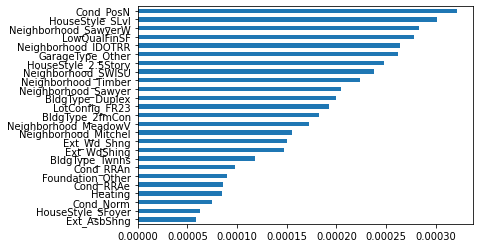

In [205]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(25).plot(kind='barh')
plt.show()

Using SVR

In [206]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [207]:
y_pred=regressor.predict(X_test)

In [208]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[164166.50424054 146000.        ]
 [164278.44843446 219500.        ]
 [164283.93158868 222500.        ]
 [164038.57616185 130000.        ]
 [164023.67608764 124000.        ]
 [164229.08770899 229000.        ]
 [164320.48408335 501837.        ]
 [164056.9869634  142000.        ]
 [164020.36854494 140000.        ]
 [164286.92282426 337000.        ]
 [164046.36002869  84000.        ]
 [164093.07111352 110500.        ]
 [164025.8416239  166000.        ]
 [164077.30855397 110000.        ]
 [164303.92754739 137500.        ]
 [164298.50580464 216500.        ]
 [164172.69357488 142953.        ]
 [164053.77349645 172500.        ]
 [164273.44519988 175000.        ]
 [164032.06596086 145900.        ]
 [164147.07203409 158000.        ]
 [164205.3206552  119500.        ]
 [164077.2140072   89471.        ]
 [163992.55370181 141000.        ]
 [164003.13339597 117500.        ]
 [164118.90523965 174000.        ]
 [164210.82238811 178000.        ]
 [164116.53308882 131400.        ]
 [163975.73366342 12

In [209]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.022696195075261105

In [210]:
### Calculate RMSE
from sklearn import preprocessing, metrics
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse1

77304.26196580124

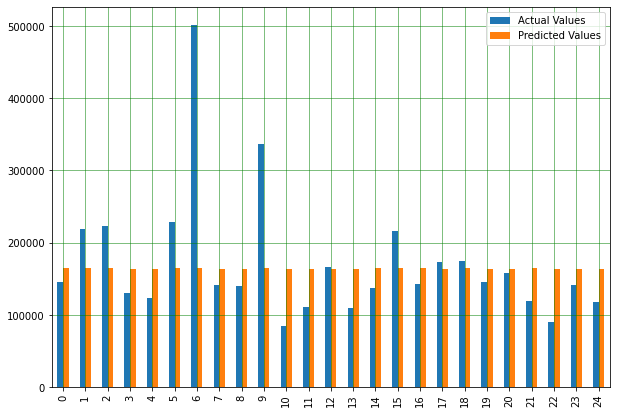

In [211]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Catboost

In [212]:
!pip install catboost

In [213]:
import os
from numpy import mean
from numpy import std
from catboost import CatBoostRegressor
best_grid = CatBoostRegressor()
best_grid.fit(X_train, y_train)
round(best_grid.score(X_train, y_train), 2)

Learning rate set to 0.039666
0:	learn: 78384.5416708	total: 53.2ms	remaining: 53.1s
1:	learn: 76562.7410691	total: 58.6ms	remaining: 29.3s
2:	learn: 74773.0200522	total: 64ms	remaining: 21.3s
3:	learn: 72979.0917052	total: 69.4ms	remaining: 17.3s
4:	learn: 71293.6203798	total: 74.9ms	remaining: 14.9s
5:	learn: 69646.4405754	total: 80.3ms	remaining: 13.3s
6:	learn: 68072.3887956	total: 85.5ms	remaining: 12.1s
7:	learn: 66494.5805839	total: 90.9ms	remaining: 11.3s
8:	learn: 64951.7084207	total: 96.3ms	remaining: 10.6s
9:	learn: 63581.0038515	total: 102ms	remaining: 10.1s
10:	learn: 62097.0943215	total: 107ms	remaining: 9.66s
11:	learn: 60777.8000778	total: 111ms	remaining: 9.12s
12:	learn: 59615.9698472	total: 116ms	remaining: 8.82s
13:	learn: 58569.2160977	total: 122ms	remaining: 8.56s
14:	learn: 57271.0910721	total: 127ms	remaining: 8.33s
15:	learn: 56054.9469889	total: 132ms	remaining: 8.13s
16:	learn: 54847.7872083	total: 137ms	remaining: 7.95s
17:	learn: 53898.4497408	total: 141ms	

1.0

In [214]:
y_pred1=best_grid.predict(X_test)

In [215]:
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.values.reshape(len(y_test),1)),1))

[[156656.03133324 146000.        ]
 [232845.38176496 219500.        ]
 [229448.43876575 222500.        ]
 [127101.10524729 130000.        ]
 [122594.65004057 124000.        ]
 [233081.96889805 229000.        ]
 [418332.27670559 501837.        ]
 [149273.6029111  142000.        ]
 [150175.3158334  140000.        ]
 [321437.1172112  337000.        ]
 [ 81478.95328369  84000.        ]
 [ 94255.86262689 110500.        ]
 [119219.94135375 166000.        ]
 [109055.65510607 110000.        ]
 [136469.78794587 137500.        ]
 [219397.7877443  216500.        ]
 [124181.70301881 142953.        ]
 [189653.75895084 172500.        ]
 [184872.74314703 175000.        ]
 [168538.75604508 145900.        ]
 [169355.15390403 158000.        ]
 [127355.55715174 119500.        ]
 [121587.89488197  89471.        ]
 [146572.38793944 141000.        ]
 [136013.40994345 117500.        ]
 [175560.9840756  174000.        ]
 [178867.87553568 178000.        ]
 [144001.17623201 131400.        ]
 [112508.22536808 12

In [216]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

0.9063391638705854

In [217]:
### Calculate RMSE
from sklearn import preprocessing, metrics
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
rmse1

23394.250365546934

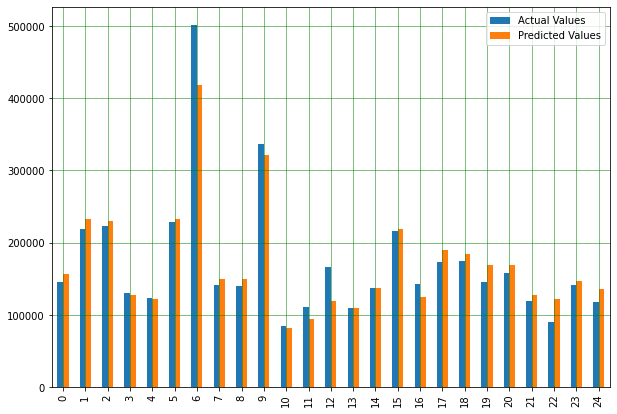

In [218]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred1.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Using random forest regressor

In [219]:
from sklearn.ensemble import RandomForestRegressor
regressor2=RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=4,
                        min_samples_split=8, n_estimators= 1000)

regressor2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [220]:
y_pred2=regressor2.predict(X_test)

In [221]:
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.values.reshape(len(y_test),1)),1))

[[159649.66352109 146000.        ]
 [221071.21252191 219500.        ]
 [233315.93064935 222500.        ]
 [141596.73556286 130000.        ]
 [134937.29620367 124000.        ]
 [217494.00414758 229000.        ]
 [311560.92854101 501837.        ]
 [166937.69209048 142000.        ]
 [162398.14651907 140000.        ]
 [267836.3890512  337000.        ]
 [129207.31833583  84000.        ]
 [121099.99630511 110500.        ]
 [137400.74192911 166000.        ]
 [136305.5238807  110000.        ]
 [175019.13114476 137500.        ]
 [223721.0347976  216500.        ]
 [145064.32546241 142953.        ]
 [184849.14601428 172500.        ]
 [195784.35922051 175000.        ]
 [151497.31630576 145900.        ]
 [172759.13383341 158000.        ]
 [143359.4631695  119500.        ]
 [140919.21507595  89471.        ]
 [144589.79875172 141000.        ]
 [143598.872003   117500.        ]
 [176771.80843122 174000.        ]
 [194456.74914549 178000.        ]
 [150632.49670024 131400.        ]
 [128392.04782206 12

In [222]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)

0.7406587757000025

In [223]:
### Calculate RMSE
from sklearn import preprocessing, metrics
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
rmse1

38928.34105851955

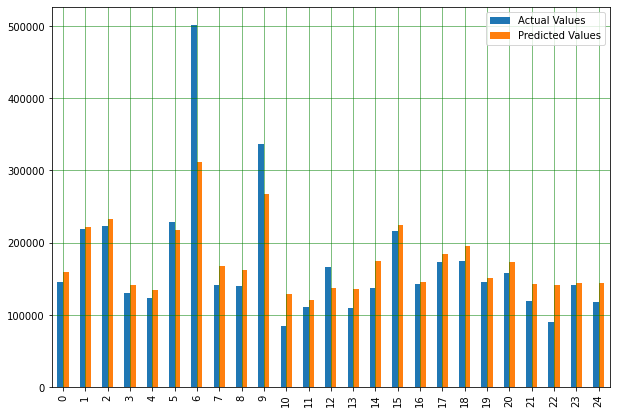

In [224]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred2.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Using Linear Regression

In [225]:
from sklearn.linear_model import LinearRegression
regressor3 = LinearRegression()
regressor3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [226]:
y_pred3=regressor3.predict(X_test)

In [227]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.values.reshape(len(y_test),1)),1))

[[194072.2491744  146000.        ]
 [246285.41340768 219500.        ]
 [238956.4705313  222500.        ]
 [126835.11032641 130000.        ]
 [133742.42960023 124000.        ]
 [214185.13747377 229000.        ]
 [404096.04202069 501837.        ]
 [155717.94908756 142000.        ]
 [154983.27171727 140000.        ]
 [327258.29161233 337000.        ]
 [ 64521.82097675  84000.        ]
 [133020.83173044 110500.        ]
 [133986.03858523 166000.        ]
 [115020.02221753 110000.        ]
 [111260.01249355 137500.        ]
 [226921.04577118 216500.        ]
 [130168.10526448 142953.        ]
 [189629.6347293  172500.        ]
 [185773.27626119 175000.        ]
 [178866.65573614 145900.        ]
 [182104.55466694 158000.        ]
 [134817.53635496 119500.        ]
 [104688.74060063  89471.        ]
 [129509.81918168 141000.        ]
 [126978.35568495 117500.        ]
 [186598.78033193 174000.        ]
 [187294.8892399  178000.        ]
 [136723.49663577 131400.        ]
 [105507.90753085 12

In [228]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred3)

0.8701089087777373

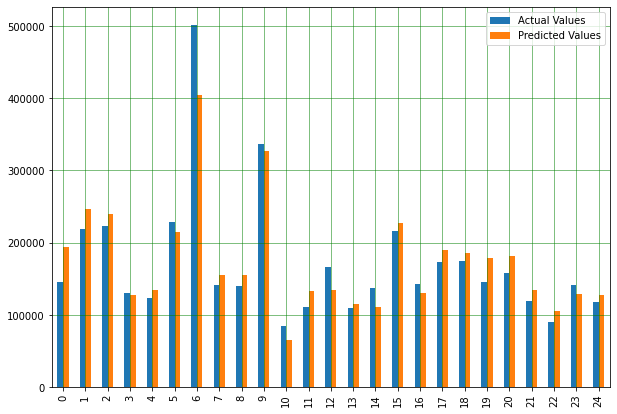

In [229]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred3.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Using LGBM Regressor

In [230]:
from lightgbm import LGBMRegressor
regressor4 = LGBMRegressor().fit(X_train, y_train)
y_pred4 = regressor4.predict(X_test)

In [231]:
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.values.reshape(len(y_test),1)),1))

[[153313.42233752 146000.        ]
 [245031.68515801 219500.        ]
 [236473.29956657 222500.        ]
 [127708.45489183 130000.        ]
 [119638.1619536  124000.        ]
 [245004.97227644 229000.        ]
 [394178.03171754 501837.        ]
 [151332.40387389 142000.        ]
 [139176.81144352 140000.        ]
 [316643.43092673 337000.        ]
 [ 79092.68576226  84000.        ]
 [ 90028.25463506 110500.        ]
 [121616.28597527 166000.        ]
 [111968.45306598 110000.        ]
 [134598.46039442 137500.        ]
 [228871.42556974 216500.        ]
 [119918.36206771 142953.        ]
 [179077.33907035 172500.        ]
 [189663.99314388 175000.        ]
 [161865.50213493 145900.        ]
 [174262.22963801 158000.        ]
 [127046.15690323 119500.        ]
 [112346.240559    89471.        ]
 [131016.81003933 141000.        ]
 [130698.57687015 117500.        ]
 [181473.17863041 174000.        ]
 [185796.84728777 178000.        ]
 [135322.42533762 131400.        ]
 [119415.28904592 12

In [232]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred4)

0.8754278588134152

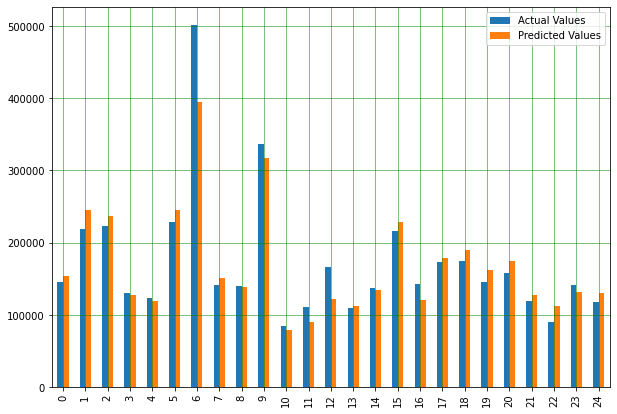

In [233]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred4.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Using Decision Tree Regressor

In [234]:
from sklearn.tree import DecisionTreeRegressor
regressor5=DecisionTreeRegressor()
regressor5.fit(X_train,y_train)
y_pred5 = regressor5.predict(X_test)

In [235]:
print(np.concatenate((y_pred5.reshape(len(y_pred5),1), y_test.values.reshape(len(y_test),1)),1))

[[142500. 146000.]
 [235000. 219500.]
 [269790. 222500.]
 [122000. 130000.]
 [ 87000. 124000.]
 [220000. 229000.]
 [415298. 501837.]
 [157900. 142000.]
 [ 79000. 140000.]
 [340000. 337000.]
 [ 80000.  84000.]
 [105000. 110500.]
 [ 98600. 166000.]
 [105000. 110000.]
 [130000. 137500.]
 [263000. 216500.]
 [136000. 142953.]
 [175000. 172500.]
 [187500. 175000.]
 [143000. 145900.]
 [159895. 158000.]
 [125500. 119500.]
 [109500.  89471.]
 [110000. 141000.]
 [169000. 117500.]
 [157000. 174000.]
 [204000. 178000.]
 [125500. 131400.]
 [148000. 125000.]
 [ 52000.  93000.]
 [266500. 262280.]
 [244000. 375000.]
 [179200. 175500.]
 [166000. 175500.]
 [204000. 213000.]
 [134432. 144000.]
 [119500.  85000.]
 [167000. 127000.]
 [227000. 237000.]
 [115000. 113000.]
 [150750. 145000.]
 [175500. 154000.]
 [129900. 120500.]
 [187500. 175000.]
 [276000. 345000.]
 [240000. 235000.]
 [133000. 125500.]
 [140000. 117000.]
 [193000. 227875.]
 [169000. 259500.]
 [350000. 410000.]
 [ 94000.  90000.]
 [123000. 14

In [236]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred5)

0.6638584318610387

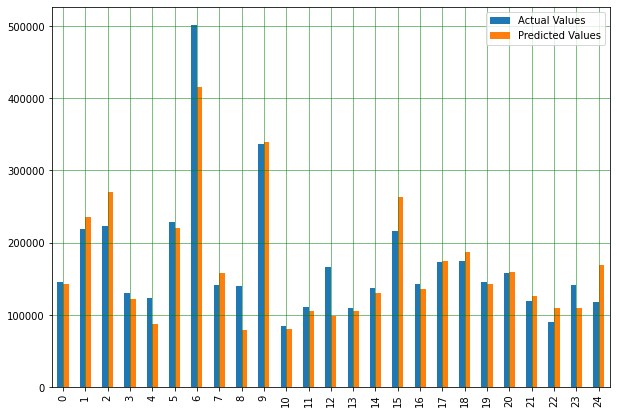

In [237]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred5.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Using Gradient Boosting

In [238]:
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

parameters = {'learning_rate': [0.04],
                  'subsample'    : [0.5],
                  'n_estimators' : [550, 600, 650],
                  'min_samples_split' : [2,3],
                  'min_samples_leaf' : [1,2],
                  'max_depth'    : [6]
                 }
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=0), param_grid = parameters, cv = 5, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_grid1 = grid_search.best_estimator_
best_grid1

best_grid1.fit(X_train, y_train)
round(best_grid1.score(X_train, y_train), 2)

1.0

In [239]:
y_pred7=best_grid1.predict(X_test)

In [240]:
print(np.concatenate((y_pred7.reshape(len(y_pred7),1), y_test.values.reshape(len(y_test),1)),1))

[[158151.60826907 146000.        ]
 [243560.19149715 219500.        ]
 [234238.5404785  222500.        ]
 [124341.84872019 130000.        ]
 [113063.97858916 124000.        ]
 [250001.51724435 229000.        ]
 [470720.3359111  501837.        ]
 [146934.9928382  142000.        ]
 [150807.64751194 140000.        ]
 [314316.14940557 337000.        ]
 [ 74085.41104378  84000.        ]
 [ 98934.93070224 110500.        ]
 [121694.59714915 166000.        ]
 [ 99620.99497457 110000.        ]
 [133068.39060834 137500.        ]
 [219399.19736548 216500.        ]
 [123689.824861   142953.        ]
 [185787.4954336  172500.        ]
 [189539.23740726 175000.        ]
 [172670.73249796 145900.        ]
 [162123.24170343 158000.        ]
 [127984.54746056 119500.        ]
 [111928.72786094  89471.        ]
 [136623.36716077 141000.        ]
 [118449.61944414 117500.        ]
 [175214.24581323 174000.        ]
 [170042.98239395 178000.        ]
 [134314.66227627 131400.        ]
 [113979.29433921 12

In [241]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred7)

0.9171681620069048

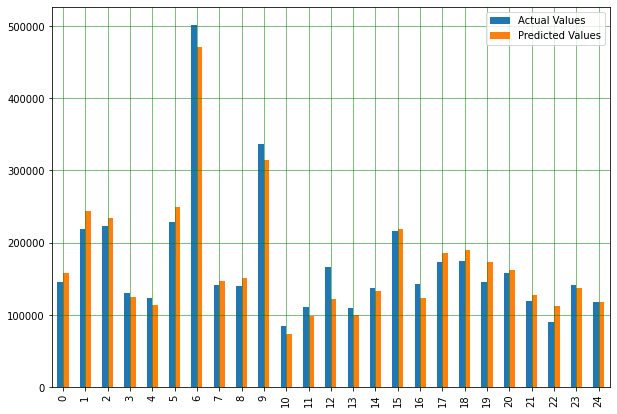

In [242]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred7.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()